In [278]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost  as xgb
import warnings
warnings.filterwarnings('ignore')

In [279]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We have to predict that id passenger will survive or not so there is only two class, so it makes it classification problem. We will further verify it

In [281]:
#checking shape of data
df.shape

(891, 12)

In [282]:
#checking more info about adata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


total 891 entries  
null data are present in age and cabin  
we havae object type data, also float and int  

In [283]:
#checking null data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 null values in age  
687 null values in cabin  
2 null vslues  in Embarked  
Too many values are null,
we will delete cabin as it is having more no: of null values

In [284]:
#checking unique value of label
df['Survived'].unique()

array([0, 1])

<Axes: >

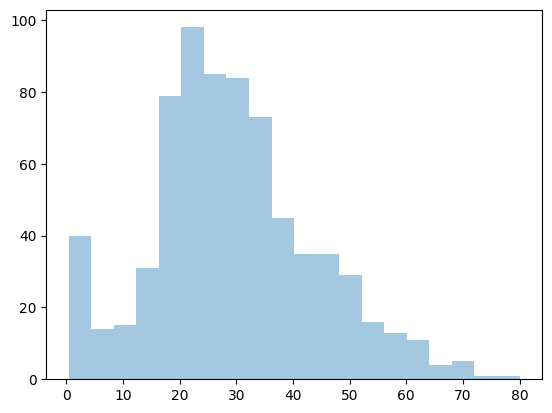

In [285]:
#Age distribution
sns.distplot(df,x=df['Age'].dropna(),kde=False)

most people are between age of 20 to 50

<Axes: xlabel='Survived', ylabel='count'>

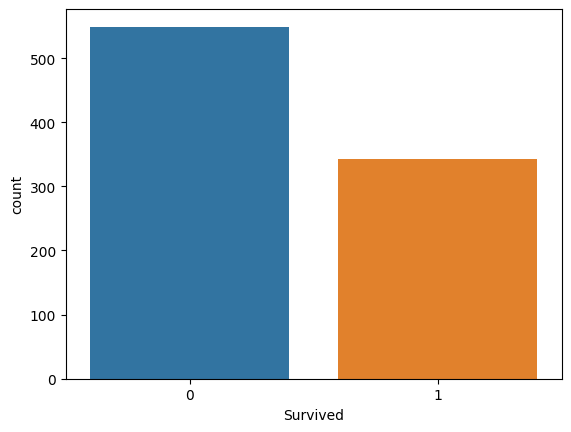

In [286]:
#lets look 0 and 1 distribuation in lable
sns.countplot(df,x='Survived')

Less no of people are survived as compared to not-survived

<Axes: xlabel='Survived', ylabel='count'>

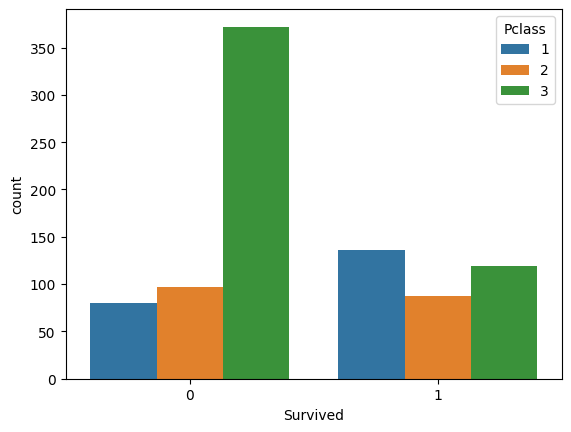

In [287]:
#lets check how much people are survived from individual class
sns.countplot(df,x='Survived',hue='Pclass')

more no of first class people are survived as compared to not-survived  
and more people are not survived from third class  


<Axes: xlabel='Survived', ylabel='count'>

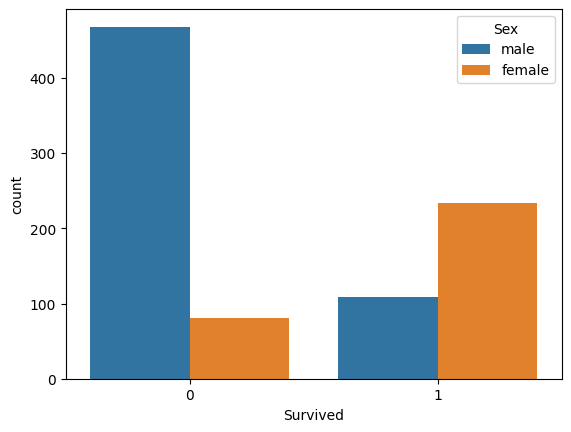

In [288]:
#lets check who survived most by gender
sns.countplot(df,x='Survived',hue='Sex')

Most female survived as compared to male

In [289]:
#Lets drop unwanted features
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [290]:
#encoding sex  and embarked feature
dummy_encode_feature=pd.get_dummies(df[['Sex','Embarked']],drop_first=True)

In [291]:
#deleting old columns and adding new
df.drop(columns=['Sex','Embarked'],axis=1,inplace=True)
df=pd.concat([df,dummy_encode_feature],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [292]:
#describe data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [293]:
# To avoid bias result from knn we are performing normaliztion
scale=MinMaxScaler()
df_scaled=scale.fit_transform(df)
df=pd.DataFrame(df_scaled,columns=df.columns)

In [294]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,NaN,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [295]:
#filling null values using knn imputer
imputer=KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df)
df=pd.DataFrame(df_imputed,columns=df.columns)


In [296]:
#checking null values after handling null values
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

<Axes: >

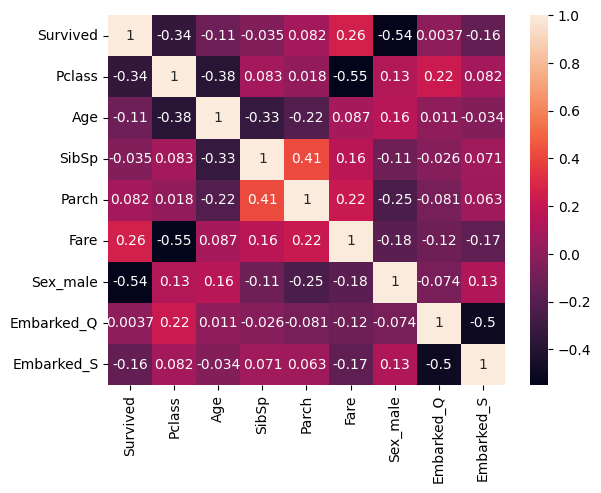

In [297]:
#checking correlation using heatmap
sns.heatmap(df.corr(),annot=True)

In [298]:
#split data for train and test
X=df.drop('Survived',axis=1)
y=df['Survived']

In [299]:
#oversampling
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_samp,y_samp=sm.fit_resample(X,y)

In [300]:
maxascr=0
randomstate=0
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(X_samp,y_samp,test_size=0.20,random_state=i)
  lm=LogisticRegression()
  lm.fit(x_train,y_train)
  y_p=lm.predict(x_test)
  ascr=accuracy_score(y_test,y_p)
  if ascr>maxascr:
    maxascr=ascr
    randomstate=i
print(f'maxscore {maxascr} at randome state {randomstate}'.format(maxascr,randomstate))


maxscore 0.8454545454545455 at randome state 77


In [301]:
x_train,x_test,y_train,y_test=train_test_split(X_samp,y_samp,test_size=0.20,random_state=randomstate)

**Model Building**

In [302]:
def fit (alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('Training Score')
  print('------------------')
  y_pred_train=alg.predict(x_train)
  print( (accuracy_score(y_train,y_pred_train)) *100 ,'\n')
  print('Testing Score')
  print('------------------')
  y_pred_test=alg.predict(x_test)
  print( (accuracy_score(y_test,y_pred_test)) *100 ,'\n')
  print('Confusion Matrix')
  print('------------------')
  print(confusion_matrix(y_test,y_pred_test))
  return alg

In [303]:
# Training LogisticRegresson
lr=fit(LogisticRegression(),x_train,x_test,y_train,y_test)


Training Score
------------------
77.33485193621867 

Testing Score
------------------
84.54545454545455 

Confusion Matrix
------------------
[[103  23]
 [ 11  83]]


In [304]:
# Training KNeighborsClassifier
knn=fit(KNeighborsClassifier(),x_train,x_test,y_train,y_test)


Training Score
------------------
86.44646924829156 

Testing Score
------------------
82.27272727272728 

Confusion Matrix
------------------
[[99 27]
 [12 82]]


In [305]:
# Training DecisionTreeClassifier
dt=fit(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)


Training Score
------------------
99.08883826879271 

Testing Score
------------------
81.81818181818183 

Confusion Matrix
------------------
[[102  24]
 [ 16  78]]


In [306]:
# Training RandomForestClassifier
rfr=fit(RandomForestClassifier(),x_train,x_test,y_train,y_test)


Training Score
------------------
99.08883826879271 

Testing Score
------------------
84.0909090909091 

Confusion Matrix
------------------
[[103  23]
 [ 12  82]]


In [307]:
# Training AdaBoostClassifier
ad=fit(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

Training Score
------------------
82.57403189066059 

Testing Score
------------------
84.0909090909091 

Confusion Matrix
------------------
[[101  25]
 [ 10  84]]


In [308]:
# Training GradientBoostingClassifier
gd=fit(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

Training Score
------------------
89.40774487471526 

Testing Score
------------------
87.72727272727273 

Confusion Matrix
------------------
[[111  15]
 [ 12  82]]


**Cross Validation**

In [309]:
#defining function for cross validation
def cross_check(alg,trained_alg,X,y,x_test,y_test,n):
  cv=cross_val_score(alg,X,y,cv=n)
  print('Cross Val Score')
  print('-------------------')
  print( '%2.2f '% (cv.mean() * 100) ,'\n')
  print( 'Algorithum Accuracy Score')
  print('-------------------')
  print( '%2.2f' % ((accuracy_score(y_test,trained_alg.predict(x_test)))*100),'\n')
  print('Difference between cross validation score and algorithum accuracy score')
  print( '%2.2f' % ( ((cv.mean())*100) - ((accuracy_score(y_test,trained_alg.predict(x_test))) * 100) ))


In [310]:
#cross vlaidation of logitstic regresson
cross_check(LogisticRegression(),lr,X,y,x_test,y_test,10)

Cross Val Score
-------------------
80.25  

Algorithum Accuracy Score
-------------------
84.55 

Difference between cross validation score and algorithum accuracy score
-4.30


In [311]:
#cross vlaidation of KNeighborsClassifier
cross_check(KNeighborsClassifier(),knn,X,y,x_test,y_test,10)

Cross Val Score
-------------------
80.48  

Algorithum Accuracy Score
-------------------
82.27 

Difference between cross validation score and algorithum accuracy score
-1.79


In [312]:
#cross vlaidation of DecisionTreeClassifier
cross_check(DecisionTreeClassifier(),dt,X,y,x_test,y_test,10)

Cross Val Score
-------------------
78.01  

Algorithum Accuracy Score
-------------------
81.82 

Difference between cross validation score and algorithum accuracy score
-3.81


In [313]:
#cross vlaidation of RandomForestClassifier
cross_check(RandomForestClassifier(),rfr,X,y,x_test,y_test,10)

Cross Val Score
-------------------
81.49  

Algorithum Accuracy Score
-------------------
84.09 

Difference between cross validation score and algorithum accuracy score
-2.60


In [314]:
#cross vlaidation of AdaBoostClassifier
cross_check(AdaBoostClassifier(),ad,X,y,x_test,y_test,10)

Cross Val Score
-------------------
81.60  

Algorithum Accuracy Score
-------------------
84.09 

Difference between cross validation score and algorithum accuracy score
-2.49


In [315]:
#cross vlaidation of GradientBoostingClassifier
cross_check(GradientBoostingClassifier(),gd,X,y,x_test,y_test,10)

Cross Val Score
-------------------
83.51  

Algorithum Accuracy Score
-------------------
87.73 

Difference between cross validation score and algorithum accuracy score
-4.22


As per the difference between cv score and accuracy score knn algorithum is looking perfect

**Hyperparameter Tuning**

In [316]:
param_grid={'n_neighbors':[2,3,5],
              'weights':['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
             'leaf_size':[50,100]
             }
tuneknn=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)
tuneknn.fit(x_train,y_train)
tuneknn.best_params_

{'leaf_size': 50,
 'metric': 'euclidean',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [317]:
#final training of kneighborsclassifier
knn=fit(KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean',leaf_size=50),x_train,x_test,y_train,y_test)

Training Score
------------------
88.95216400911163 

Testing Score
------------------
85.9090909090909 

Confusion Matrix
------------------
[[102  24]
 [  7  87]]


In [318]:
#saving model
import pickle
pickle.dump(knn,open('knn_titanic.sav','wb'))

In [319]:
#loading model
model=pickle.load(open('knn_titanic.sav','rb'))
cmp_df=pd.DataFrame()
cmp_df['y_test']=y_test
cmp_df['y_pred']=model.predict(x_test)
cmp_df

,y_test,y_pred
27,0.0,1.0
1064,1.0,1.0
962,1.0,1.0
100,0.0,1.0
721,0.0,1.0
...,...,...
253,0.0,0.0
8,1.0,1.0
872,0.0,1.0
398,0.0,0.0
